<a href="https://colab.research.google.com/github/gunnar402/AI-Crash-Course-Chapter-6/blob/main/Chapter_6_Final_Thompson_and_Random_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Relative Return: 95 %


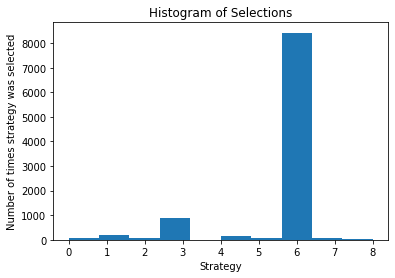

In [ ]:
# Chapter 6__AI Advertising with Thomspon Sampling and Random Sampling

# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import random

# Creating the simulation environment

# Conversion Rates and Samples
conversion_rates = [0.05, 0.13, 0.09, 0.16, 0.11, 0.04, 0.20, 0.08, 0.01]
N = 10000 # This is number of customers
d = 9 # This is number of strategies 

# Simulation Dataset
X = np.array(np.zeros([N,d]))
for i in range(N):
  for j in range(d):
    if np.random.rand() <= conversion_rates[j]:
      X[i,j] = 1

# Implementing Random Selection and Thompson Sampling
strategies_selected_rs = []
strategies_selected_ts = []
total_rewards_rs = 0
total_rewards_ts = 0
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d

for n in range(0, N):
  # Random Selection
  strategy_rs = random.randrange(d)
  strategies_selected_rs.append(strategy_rs)
  reward_rs = X[n, strategy_rs]
  total_rewards_rs = total_rewards_rs + reward_rs

  # Thompson Sampling
  strategy_ts = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] +1, numbers_of_rewards_0[i] +1)
    if random_beta > max_random:
        max_random = random_beta
        strategy_ts = i
  reward_ts = X[n, strategy_ts] 
  if reward_ts == 1:
    numbers_of_rewards_1[strategy_ts] = numbers_of_rewards_1[strategy_ts] +1
  else:
    numbers_of_rewards_0[strategy_ts] = numbers_of_rewards_0[strategy_ts] + 1   
  strategies_selected_ts.append(strategy_ts)
  total_rewards_ts = total_rewards_ts + reward_ts

# Computing Relative Return
relative_return = (total_rewards_ts - total_rewards_rs) / total_rewards_rs * 100
print("Relative Return: {:.0f} %".format(relative_return))

# Plotting Histogram Selections
plt.hist(strategies_selected_ts)
plt.title('Histogram of Selections')
plt.xlabel('Strategy')
plt.ylabel('Number of times strategy was selected')
plt.show()

 





